In [1]:
import pandas as pd
import  matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../../data/processed/Roommate_Compatibility_Survey.csv")
df.head()

,Ideal_Study_Environment_Description,Attitude_towards_Borrowing_Sharing,Description_of_Personal_Room_At_Home,Desired_Room_Attributes,Bedtime_Preference,Wake_Up_Time_Preference,Planned_Study_Time_Preference,Study_Time_Preference,Private_Time_Requirements,Guest_Frequency_Preference,...,Guest_Frequency_Preference_Often,Guest_Frequency_Preference_Rarely,Guest_Frequency_Preference_Sometimes,Conflict_Handling_Method_I address issues in a blunt manner.,Conflict_Handling_Method_I am able to express my feelings and concerns in a calm manner.,Conflict_Handling_Method_I am not comfortable addressing a conflict.,Conflict_Handling_Method_I hint at what bothers me in a joking manner.,Communication_Preference_with_Roommate_Face-to-face,Communication_Preference_with_Roommate_Notes/letters,Communication_Preference_with_Roommate_Text or messaging apps
0,0.0,1.0,3.0,1.0,1.0,4.0,2.0,2.0,1.0,1.0,...,0,1,0,0,0,0,1,1,0,0
1,0.0,1.0,3.0,1.0,3.0,1.0,1.0,2.0,2.0,4.0,...,0,0,0,0,0,1,0,1,0,0
2,0.0,1.0,2.0,1.0,3.0,1.0,2.0,0.0,2.0,3.0,...,1,0,0,0,0,1,0,1,0,0
3,0.0,1.0,3.0,1.0,3.0,0.0,3.0,1.0,0.0,2.0,...,0,0,1,0,0,1,0,1,0,0
4,0.0,0.0,2.0,1.0,3.0,3.0,3.0,2.0,1.0,1.0,...,0,1,0,0,0,0,1,1,0,0


In [3]:
df.columns

Index(['Ideal_Study_Environment_Description',
       'Attitude_towards_Borrowing_Sharing',
       'Description_of_Personal_Room_At_Home', 'Desired_Room_Attributes',
       'Bedtime_Preference', 'Wake_Up_Time_Preference',
       'Planned_Study_Time_Preference', 'Study_Time_Preference',
       'Private_Time_Requirements', 'Guest_Frequency_Preference',
       'Age_normalized', 'Gender_encoded', 'Religion_encoded',
       'Parents_Abroad_encoded', 'Living_with_Parents_encoded',
       'Preferred_Roommate_Relationship_Type_encoded',
       'Obnoxious behavior_encoded', 'Loud music/TV_encoded',
       'Being loud when I’m studying/sleeping_encoded',
       'Eating my food_encoded', 'Not picking up after themselves_encoded',
       'Being unfriendly_encoded',
       'Lack of respect for me and my privacy_encoded',
       'Not being open-minded_encoded', 'Bad personal hygiene_encoded',
       'Using my things without asking_encoded',
       'Having guests over too much_encoded', 'Messy_encoded

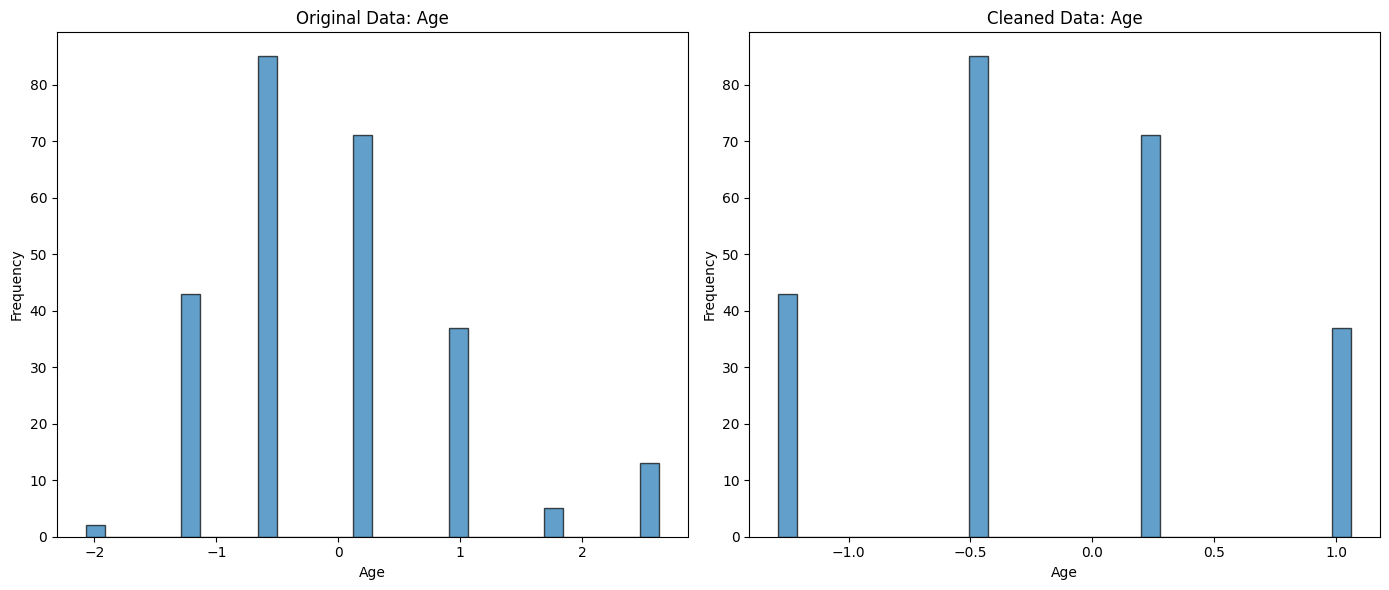

In [4]:
def remove_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    cleaned_df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    return cleaned_df

# Remove outliers from the 'age' column
df_clean = remove_outliers(df, 'Age_normalized')
df['Age_normalized'] = df['Age_normalized']

# Visualize original data and cleaned data for the 'age' column
plt.figure(figsize=(14, 6))

# Original data
plt.subplot(1, 2, 1)
plt.hist(df['Age_normalized'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Original Data: Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Cleaned data
plt.subplot(1, 2, 2)
plt.hist(df_clean['Age_normalized'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Cleaned Data: Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [5]:
df_clean.head()

,Ideal_Study_Environment_Description,Attitude_towards_Borrowing_Sharing,Description_of_Personal_Room_At_Home,Desired_Room_Attributes,Bedtime_Preference,Wake_Up_Time_Preference,Planned_Study_Time_Preference,Study_Time_Preference,Private_Time_Requirements,Guest_Frequency_Preference,...,Guest_Frequency_Preference_Often,Guest_Frequency_Preference_Rarely,Guest_Frequency_Preference_Sometimes,Conflict_Handling_Method_I address issues in a blunt manner.,Conflict_Handling_Method_I am able to express my feelings and concerns in a calm manner.,Conflict_Handling_Method_I am not comfortable addressing a conflict.,Conflict_Handling_Method_I hint at what bothers me in a joking manner.,Communication_Preference_with_Roommate_Face-to-face,Communication_Preference_with_Roommate_Notes/letters,Communication_Preference_with_Roommate_Text or messaging apps
0,0.0,1.0,3.0,1.0,1.0,4.0,2.0,2.0,1.0,1.0,...,0,1,0,0,0,0,1,1,0,0
1,0.0,1.0,3.0,1.0,3.0,1.0,1.0,2.0,2.0,4.0,...,0,0,0,0,0,1,0,1,0,0
2,0.0,1.0,2.0,1.0,3.0,1.0,2.0,0.0,2.0,3.0,...,1,0,0,0,0,1,0,1,0,0
3,0.0,1.0,3.0,1.0,3.0,0.0,3.0,1.0,0.0,2.0,...,0,0,1,0,0,1,0,1,0,0
4,0.0,0.0,2.0,1.0,3.0,3.0,3.0,2.0,1.0,1.0,...,0,1,0,0,0,0,1,1,0,0


In [6]:
df.info

<bound method DataFrame.info of      Ideal_Study_Environment_Description  Attitude_towards_Borrowing_Sharing  \
0                                    0.0                                 1.0   
1                                    0.0                                 1.0   
2                                    0.0                                 1.0   
3                                    0.0                                 1.0   
4                                    0.0                                 0.0   
..                                   ...                                 ...   
251                                  1.0                                 1.0   
252                                  0.0                                 1.0   
253                                  1.0                                 0.0   
254                                  0.0                                 0.0   
255                                  0.0                                 1.0   

     De

C:\Users\khaled\AppData\Local\Temp\ipykernel_3404\2790936739.py:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


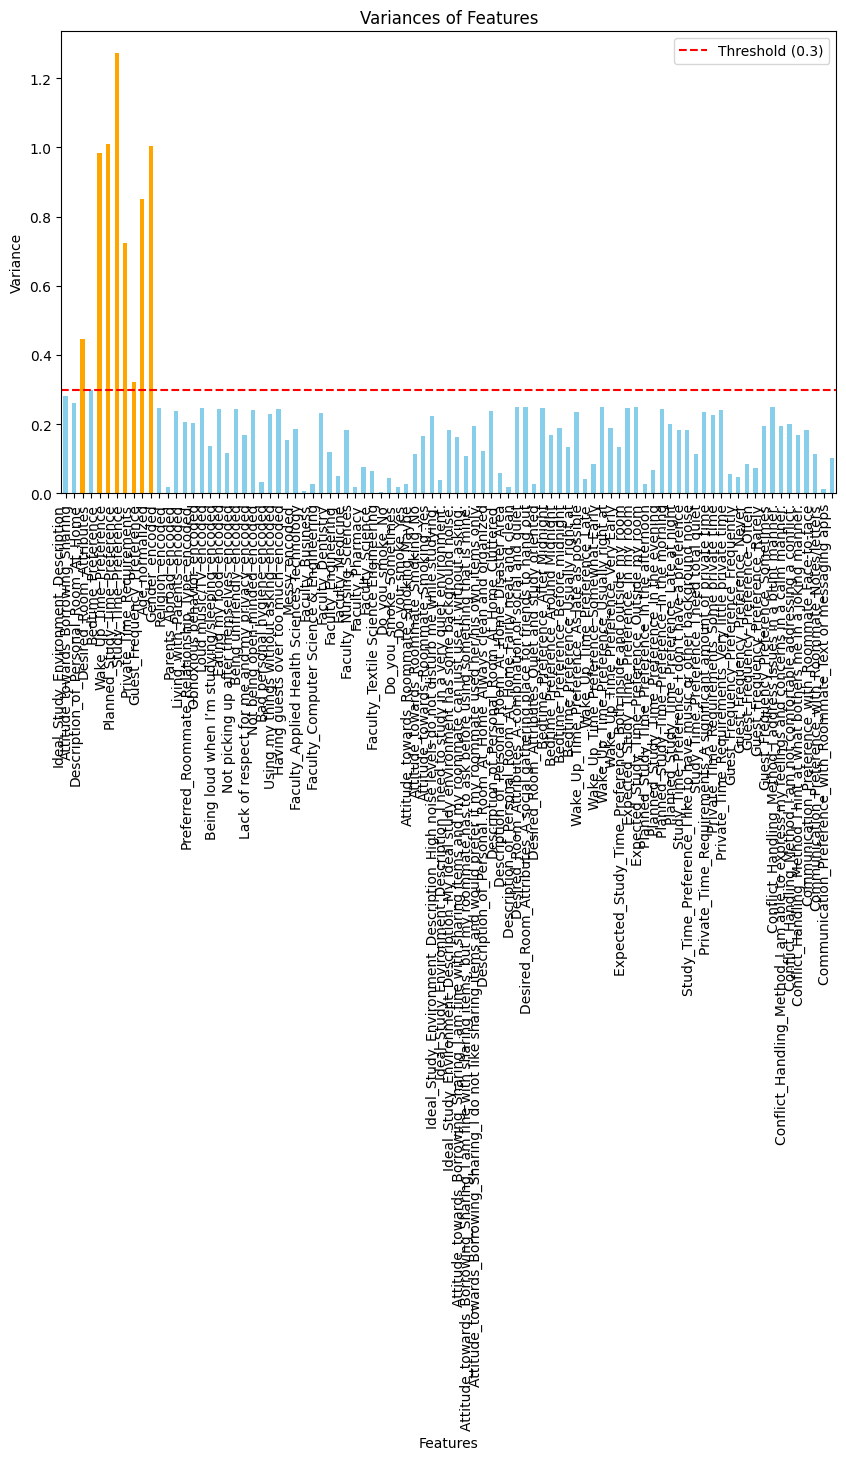

In [7]:
import matplotlib.pyplot as plt

# Define the threshold
threshold = 0.3 # Adjust the threshold as needed

# Calculate variances of the features
variances = df.var()

# Plot the variances
plt.figure(figsize=(10, 6))
variances.plot(kind='bar', color=['skyblue' if var < threshold else 'orange' for var in variances])
plt.title('Variances of Features')
plt.xlabel('Features')
plt.ylabel('Variance')
plt.xticks(rotation=90, ha='right')
plt.axhline(y=threshold, color='red', linestyle='--', label=f'Threshold ({threshold})')
plt.legend()
plt.tight_layout()
plt.show()


In [149]:
# Define the threshold
threshold = 0.3

variances = df.var()

low_threshold_columns = variances[variances < threshold]
high_threshold_columns = variances[variances >= threshold]

print("Columns with variances below the threshold (<", threshold, "):")
print(low_threshold_columns)

print("\nColumns with variances equal to or above the threshold (>= ", threshold, "):")
print(high_threshold_columns)


Columns with variances below the threshold (< 0.3 ):
Ideal_Study_Environment_Description                                       0.281373
Attitude_towards_Borrowing_Sharing                                        0.262362
Desired_Room_Attributes                                                   0.299755
Gender_encoded                                                            0.248392
Religion_encoded                                                          0.019225
                                                                            ...   
Conflict_Handling_Method_I am not comfortable addressing a conflict.      0.169347
Conflict_Handling_Method_I hint at what bothers me in a joking manner.    0.184252
Communication_Preference_with_Roommate_Face-to-face                       0.112730
Communication_Preference_with_Roommate_Notes/letters                      0.011627
Communication_Preference_with_Roommate_Text or messaging apps             0.103860
Length: 83, dtype: float64

Column

In [150]:
filtered_df = df[high_threshold_columns.index]
filtered_df.head()

,Description_of_Personal_Room_At_Home,Bedtime_Preference,Wake_Up_Time_Preference,Planned_Study_Time_Preference,Study_Time_Preference,Private_Time_Requirements,Guest_Frequency_Preference,Age_normalized
0,3.0,1.0,4.0,2.0,2.0,1.0,1.0,1.062484
1,3.0,3.0,1.0,1.0,2.0,2.0,4.0,-0.505216
2,2.0,3.0,1.0,2.0,0.0,2.0,3.0,1.062484
3,3.0,3.0,0.0,3.0,1.0,0.0,2.0,0.278634
4,2.0,3.0,3.0,3.0,2.0,1.0,1.0,-0.505216


In [151]:
filtered_df.columns


Index(['Description_of_Personal_Room_At_Home', 'Bedtime_Preference',
       'Wake_Up_Time_Preference', 'Planned_Study_Time_Preference',
       'Study_Time_Preference', 'Private_Time_Requirements',
       'Guest_Frequency_Preference', 'Age_normalized'],
      dtype='object')

In [152]:
filtered_df.to_csv('../../data/final/Roommate_Compatibility_Survey.csv', index=False)